该脚本用于保留倾斜方形研究区域内的地震和台站，删除超出研究区域的数据。

This script aims at retaining the earthquakes and stations within the study region of a oblique box

In [11]:
# load functions for data processing
%run ../utils/functions_for_data.ipynb

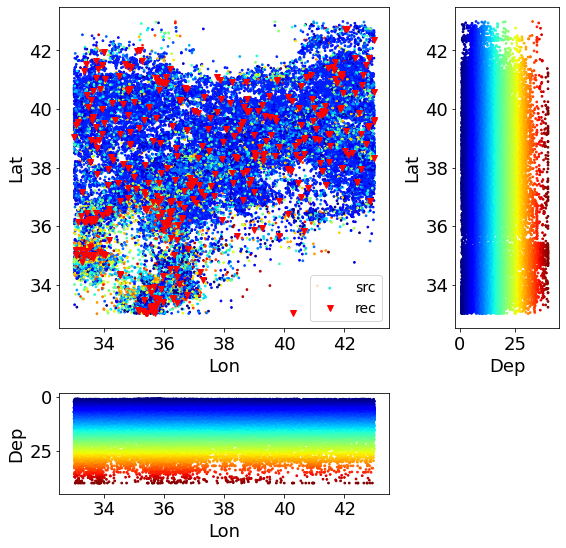

In [12]:
# 读取数据文件 read .dat file
fname = "input_data/src_rec_Turkey.dat"
[ev_info_obs, st_info_obs] = read_src_rec_file(fname)

# 数据分布画图 plot data distribution
fig_ev_st_distribution_dep(ev_info_obs, st_info_obs)


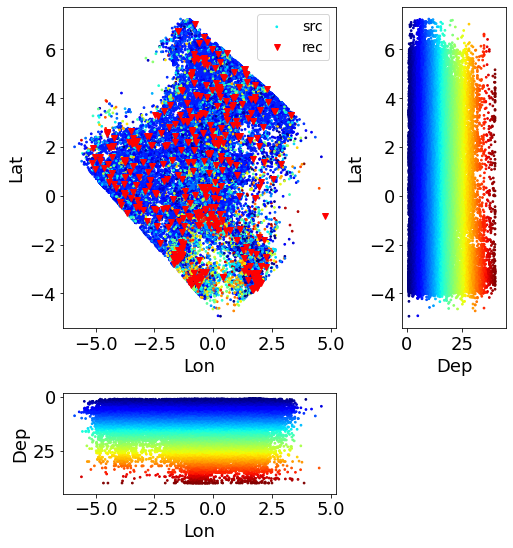

In [13]:
# 我们保留区域中心在 37N,37E，倾斜角为45度，纵向[-2,3]，横向[-1.3,1.3]，深度范围在0.5-40公里的地震和台站
# we only retain the earthquakes and stations within the target study region: 
# center of the region: 37N,37E  x-axis: [-1.3,1.3] (degree), y-axis [-2,3] degree, z-axis: 0.5-40 km.

central_lat = 37.0
central_lon = 37.0
rotation_angle = 45.0

# 第一步，将地震和台站旋转到指定研究区域，区域坐标为(0,0) 
# step 1: rotate the source and receiver locations to the new coordinate system. The center of the region is (0,0)
[ev_info_obs, st_info_obs] = rotate_src_rec(ev_info_obs,st_info_obs,central_lat,central_lon,rotation_angle)

# 数据分布画图 plot data distribution
fig_ev_st_distribution_dep(ev_info_obs, st_info_obs)

delete 77899 events out of the region, now 66672 earthquakes are retained within the study region


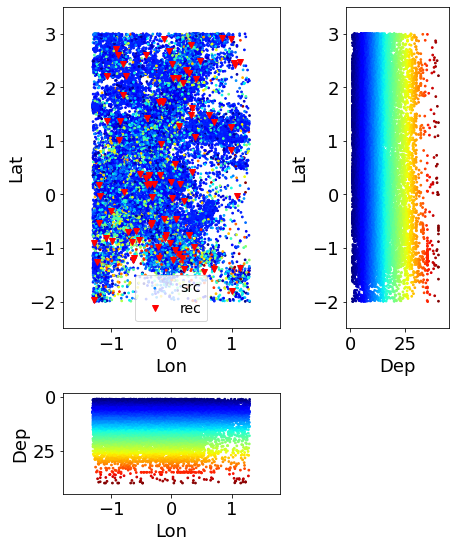

In [14]:
# 第二步, 我们保留x范围在[-1.3,1.3]度，y范围在[-2,3]度，深度范围在0.5-40公里的地震和台站
# we only retain the earthquakes and stations within the study region:  x-axis: [-1.3,1.3] (degree), y-axis [-2,3] degree, z-axis: 0.5-40 km.

lat1 = -2.0;    lat2 = 3.0; 
lon1 = -1.3;    lon2 = 1.3; 
dep1 =  0.5;    dep2 = 40.0; 

# 限制地震分布区域 limit earthquake region
ev_info_obs = limit_ev_region(ev_info_obs,lat1,lat2,lon1,lon2,dep1,dep2)

# 限制台站分布区域 limit station region
ev_info_obs = limit_st_region(ev_info_obs,st_info_obs,lat1,lat2,lon1,lon2)

# 数据分布画图 plot data distribution
fig_ev_st_distribution_dep(ev_info_obs, st_info_obs)

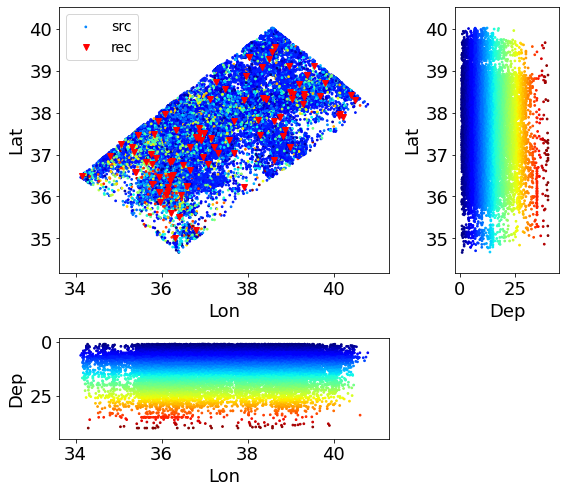

In [16]:
# 第三步，将地震和台站坐标旋转回来
# step 3: rotate the source and receiver locations back to the original coordinate system.
[ev_info_obs, st_info_obs] = rotate_src_rec_reverse(ev_info_obs, st_info_obs,central_lat,central_lon,rotation_angle)

fig_ev_st_distribution_dep(ev_info_obs, st_info_obs)

In [17]:
# output data 输出数据
out_path = "output_data"

# 保存用于TomoATT反演的数据文件 save data for TomoATT
out_fname = "%s/alg1b_src_rec.dat"%(out_path)
write_src_rec_file(out_fname,ev_info_obs,st_info_obs)

# 保存用于画图的地震列表文件 save earthquake list for plotting
out_fname_ev = "%s/alg1b_ev_list.dat"%(out_path)
write_src_list_file(out_fname_ev,ev_info_obs)

# 保存用于画图的台站列表文件 save station list for plotting
out_fname_st = "%s/alg1b_st_list.dat"%(out_path)
write_rec_list_file(out_fname_st,ev_info_obs,st_info_obs)


earthquake and station region, lat:   34.8 -   40.0, lon:   34.1 -   40.8, dep:   -1.9 -   40.0
